In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Data Load
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits["data"], digits["target"]

In [4]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [5]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [6]:
scaled_data = scaler.fit_transform(data)

In [7]:
# 시각화 - T-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [8]:
tsne_latent = tsne.fit_transform(scaled_data)

In [9]:
def visualize_latent_space_with_label(latent, pred):
    for label in np.unique(pred):
        index = pred == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

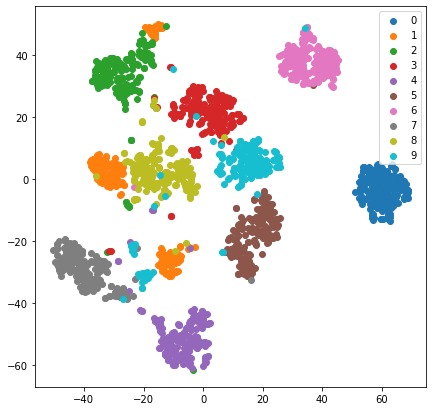

In [10]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, target)

In [11]:
# CLustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

In [12]:
# 학습
kmeans.fit(scaled_data)#

KMeans(n_clusters=10)

In [13]:
# 예측
pred = kmeans.predict(scaled_data)

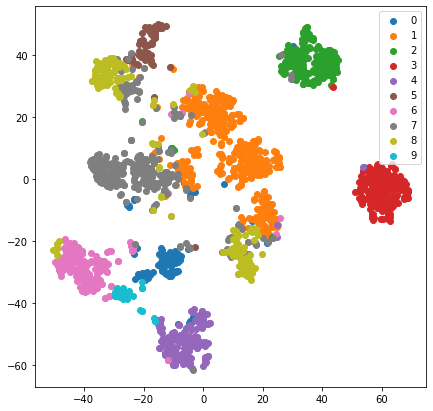

In [14]:
# 시각화
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pred)

In [15]:
# PCA and Clustering
# 차원 축소시킨 데이터 생성
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca.fit(scaled_data)

PCA(n_components=12)

In [16]:
pca_data = pca.transform(scaled_data)

In [17]:
# K-Means 학습
pca_kmeans = KMeans(n_clusters=10)

pca_kmeans.fit(pca_data)

KMeans(n_clusters=10)

In [18]:
# 예측
pca_pred = pca_kmeans.predict(pca_data)

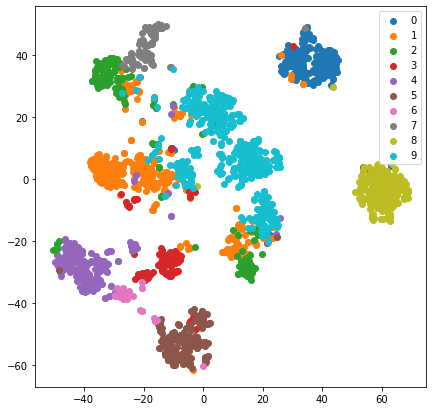

In [19]:
# 시각화
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pca_pred)

Text(0.5, 1.0, 'PCA Clustering')

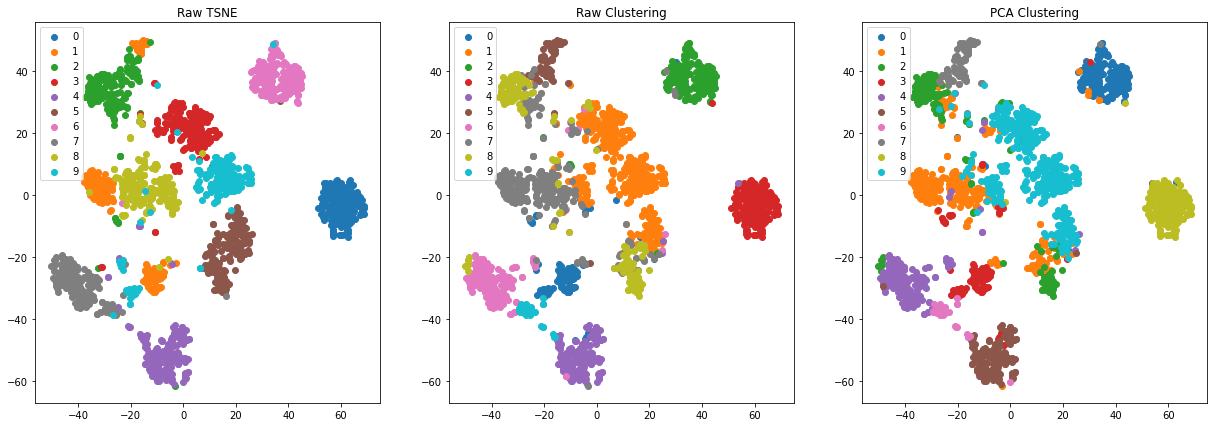

In [20]:
# 비교
plt.figure(figsize=(21, 7))
plt.subplot(131)
visualize_latent_space_with_label(tsne_latent, target)
plt.title("Raw TSNE")
plt.subplot(132)
visualize_latent_space_with_label(tsne_latent, pred)
plt.title("Raw Clustering")
plt.subplot(133)
visualize_latent_space_with_label(tsne_latent, pca_pred)
plt.title("PCA Clustering")

In [21]:
scaled_data.shape

(1797, 64)

In [22]:
pca_data.shape

(1797, 12)

In [23]:
# 차원 축소 후 데이터의 크기가 줄어듦 (64->12로 차원이 줄었다)